# Intro to HPC: Solar Cell project

Project: Solar Power for Affordable Housing through Computational Design of Low-Cost/High-Efficiency Solar Cells.
Author: AlvaroVM [https://alvarovm.github.io](http://alvarovm.github.io)

Version: 0.0.2

## Part 2 Cleaning and cannonizing DB

For this second part we will need to complete the dataset transformation in part 1 and save the results in a file.

Author: AlvaroVM [https://alvarovm.github.io](http://alvarovm.github.io)
Version: 0.0.1

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
SRC_DIR='..'
sys.path.append(os.path.join(SRC_DIR, 'code'))
import utils

import pandas as pd
#https://github.com/jmcarpenter2/swifter
#import swifter
#2-TSNE-UMAP-map-cuda-Copy1

from tqdm.autonotebook import tqdm
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs 
from rdkit.Chem import Draw
from rdkit.Chem.rdMolDescriptors import  GetHashedMorganFingerprint
from rdkit.DataStructs import ConvertToNumpyArray

from sklearn.manifold import TSNE

import hdbscan

import seaborn as sns

utils.plot_settings2()

results_path = os.path.join(SRC_DIR,'results')

In [3]:
df = pd.read_pickle('my_dataframe.pkl').fillna(value = 0)
print('Column names: {}'.format(str(df.columns.tolist())))
print('Table Shape: {}'.format(df.shape))


Column names: ['inchikey', 'smi_pre', 'smi_post', 'lambda_sTDA (nm)', 'f1_sTDA', 'lumo_dft', 'homo_dft', 'dmom_dft (D)', 'lambda_z (nm)', 'f1_z', 'lumo_z', 'homo_z', 'dmom_z (D)', 'lumo_mopac', 'homo_mopac', 'dmom_mopac (D)', 'lambda_tddft (nm)', 'f1_tddft', 'lambda_exp_max (nm)', 'epsilon_exp_max ', 'lambda_exp_min (nm)', 'epsilon_exp_min ', 'solvent', 'nostda', 'smiles', 'mol', 'morgan_fp_array', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings', 'NumValenceElectrons', 'valid_smi', 'cannon_smiles', 'gap_mopac', 'gap_zindo', 'gap_dft']
Table Shape: (5660, 49)


### Exercises
* Use `df.count()` and `df.hist()` to have idea of the dataset distribution

In [4]:
df.count()

inchikey                    5660
smi_pre                     5660
smi_post                    5660
lambda_sTDA (nm)            5660
f1_sTDA                     5660
lumo_dft                    5660
homo_dft                    5660
dmom_dft (D)                5660
lambda_z (nm)               5660
f1_z                        5660
lumo_z                      5660
homo_z                      5660
dmom_z (D)                  5660
lumo_mopac                  5660
homo_mopac                  5660
dmom_mopac (D)              5660
lambda_tddft (nm)           5660
f1_tddft                    5660
lambda_exp_max (nm)         5660
epsilon_exp_max             5660
lambda_exp_min (nm)         5660
epsilon_exp_min             5660
solvent                     5660
nostda                      5660
smiles                      5660
mol                         5660
morgan_fp_array             5660
NHOHCount                   5660
NOCount                     5660
NumAliphaticCarbocycles     5660
NumAliphat

array([[<Axes: title={'center': 'lambda_sTDA (nm)'}>,
        <Axes: title={'center': 'f1_sTDA'}>,
        <Axes: title={'center': 'lumo_dft'}>,
        <Axes: title={'center': 'homo_dft'}>,
        <Axes: title={'center': 'dmom_dft (D)'}>,
        <Axes: title={'center': 'lambda_z (nm)'}>],
       [<Axes: title={'center': 'f1_z'}>,
        <Axes: title={'center': 'lumo_z'}>,
        <Axes: title={'center': 'homo_z'}>,
        <Axes: title={'center': 'dmom_z (D)'}>,
        <Axes: title={'center': 'lumo_mopac'}>,
        <Axes: title={'center': 'homo_mopac'}>],
       [<Axes: title={'center': 'dmom_mopac (D)'}>,
        <Axes: title={'center': 'lambda_tddft (nm)'}>,
        <Axes: title={'center': 'f1_tddft'}>,
        <Axes: title={'center': 'lambda_exp_max (nm)'}>,
        <Axes: title={'center': 'epsilon_exp_max '}>,
        <Axes: title={'center': 'lambda_exp_min (nm)'}>],
       [<Axes: title={'center': 'epsilon_exp_min '}>,
        <Axes: title={'center': 'NHOHCount'}>,
        <

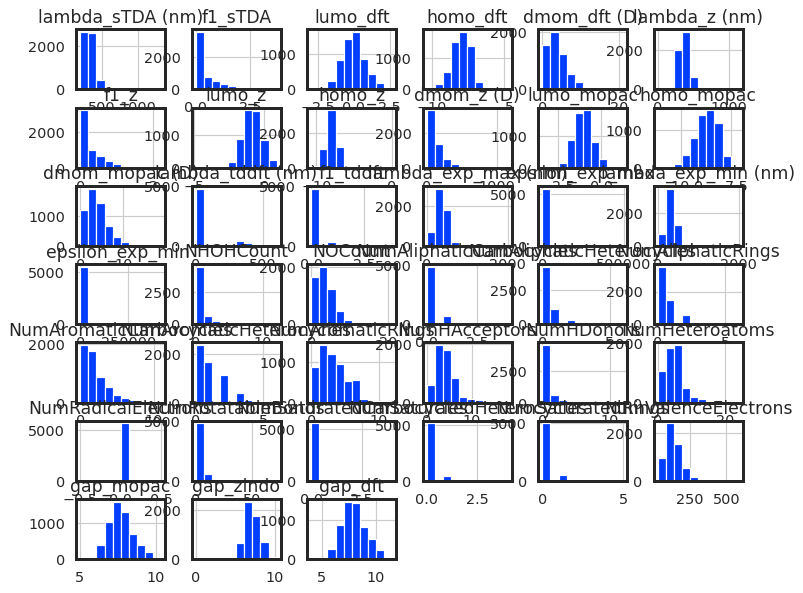

In [5]:
df.hist()

* Find the molecules with the smallest `lambda_sTDA (nm)`, for example those with values  more less than 200 nm. Do they have anything in common?

In [10]:
df[df['lambda_sTDA (nm)'] < 200]

,inchikey,smi_pre,smi_post,lambda_sTDA (nm),f1_sTDA,lumo_dft,homo_dft,dmom_dft (D),lambda_z (nm),f1_z,...,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumValenceElectrons,valid_smi,cannon_smiles,gap_mopac,gap_zindo,gap_dft
4304,LGQXVRIHIPWAFZ-UHFFFAOYSA-N,Cc1cc(nn1Cn1nc(cc1C)C)C,Cc1cc(nn1Cn1nc(cc1C)C)C,194.4,0.183671,2.3822,-8.8117,0.37845,259.979447,0.283709,...,2,0,0,0,80,True,Cc1cc(nn1Cn1nc(cc1C)C)C,9.466,9.0717,11.1939


* Plot a distribution function with `sns.distplot()` for `lambda_exp_min (nm)` and `lambda_exp_max (nm)`

/tmp/ipykernel_1728363/460598664.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lem)


<Axes: ylabel='Density'>

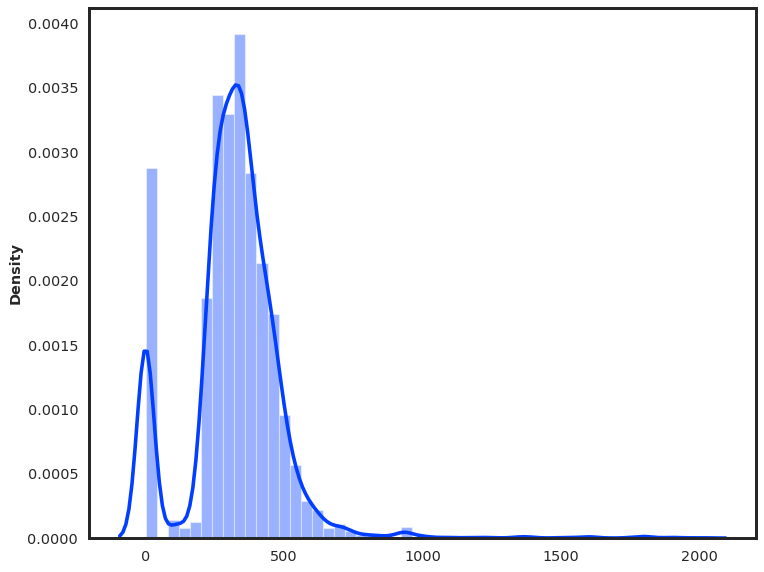

In [15]:
lem = df['lambda_exp_min (nm)'].tolist()
sns.distplot(lem)

/tmp/ipykernel_1728363/3862911370.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lemax)


<Axes: ylabel='Density'>

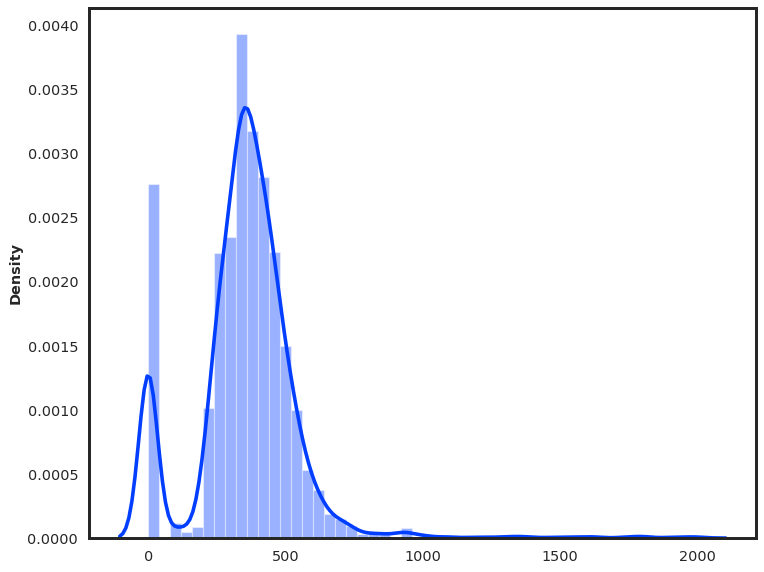

In [18]:
lemax = df['lambda_exp_max (nm)'].tolist()
sns.distplot(lemax)


* Compute the difference between `lambda_sTDA (nm)` and `lambda_exp_min (nm)`, and plot the distribution of this difference


<Axes: xlabel='lambda_sTDA (nm)', ylabel='lambda_exp_min (nm)'>

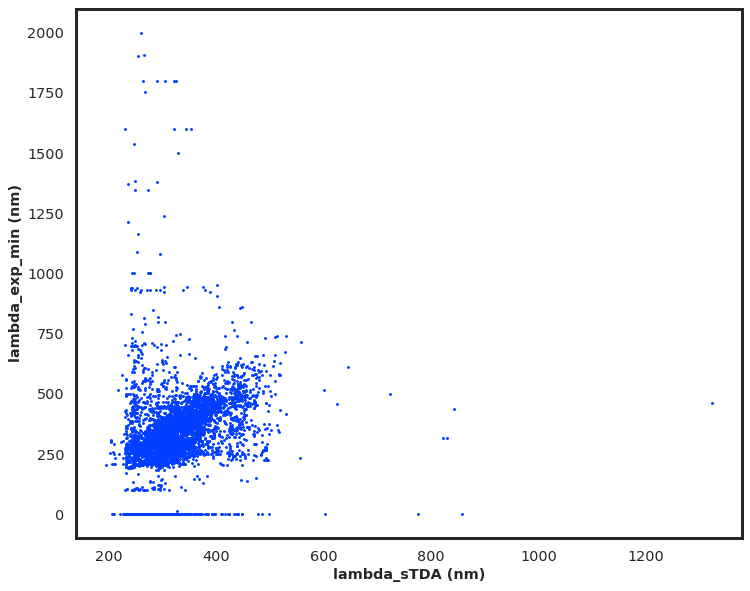

In [19]:
df.plot.scatter(x='lambda_sTDA (nm)', y='lambda_exp_min (nm)',s=2)

* Plot `lambda_exp_min (nm)` vs `lambda_exp_max (nm)`

<Axes: xlabel='lambda_exp_min (nm)', ylabel='lambda_exp_max (nm)'>

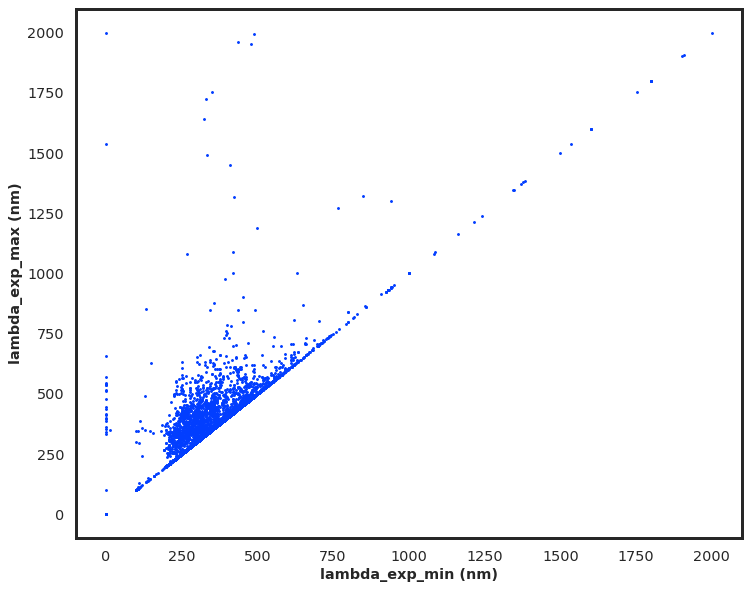

In [20]:
df.plot.scatter(x='lambda_exp_min (nm)', y='lambda_exp_max (nm)',s=2)

* Plot `lambda_exp_min (nm)` vs `lambda_exp_max (nm)`


* Plot `lambda_exp_min (nm)` vs `lambda_sTDA (nm)`


* Plot the distribution function of the molecules that absorb light in the UV/Vis spectra, eg. `200 < lambda_sTDA (nm) < 800`

/tmp/ipykernel_1728363/3724145240.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lambda_sTDA (nm)'])


<Axes: xlabel='lambda_sTDA (nm)', ylabel='Density'>

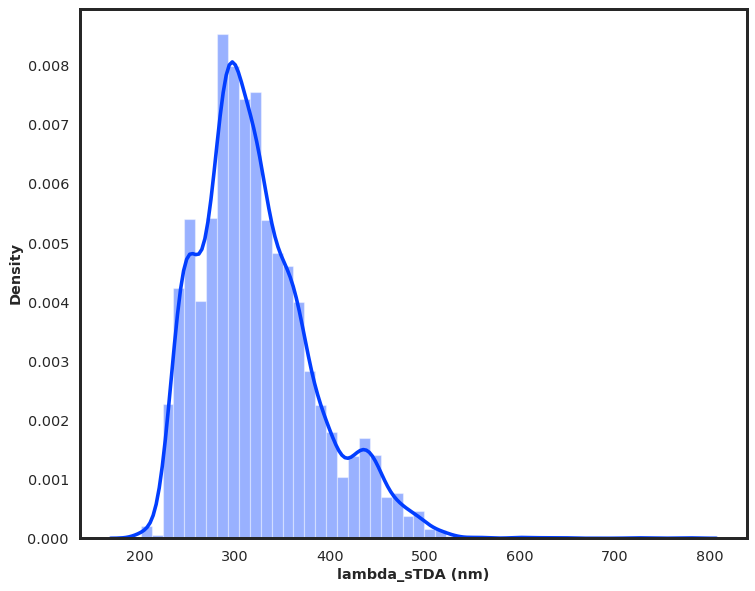

In [26]:
df = df[df['lambda_sTDA (nm)'] > 200]
df = df[df['lambda_sTDA (nm)'] < 800]
sns.distplot(df['lambda_sTDA (nm)'])


* Compare and plot the diffenrece between `lambda_sTDA (nm)` and `lambda_z (nm)`

<Axes: xlabel='lambda_sTDA (nm)', ylabel='lambda_z (nm)'>

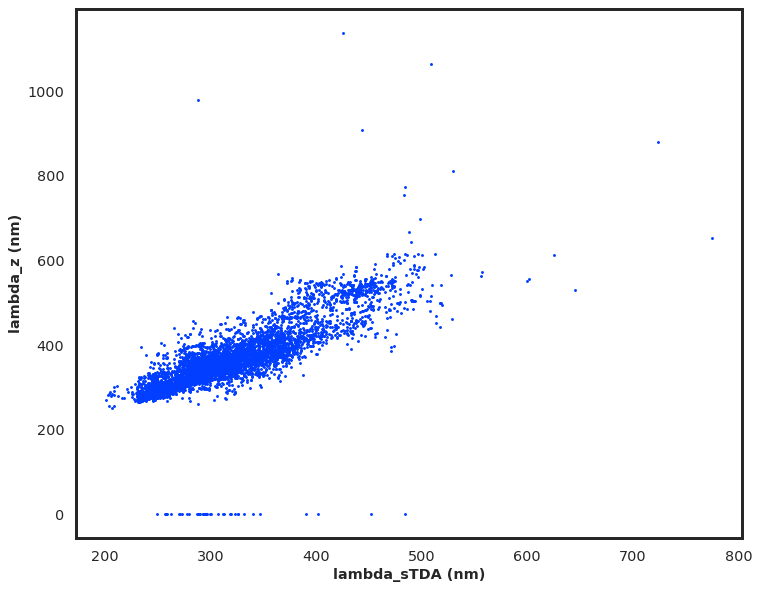

In [27]:
df.plot.scatter(x='lambda_sTDA (nm)', y='lambda_z (nm)',s=2)


* Find the relations using `scatter_matrix` among the excitation energies predicted with the methods `gapdft`, `gapz`, `gapmopac`, `lambda_z (nm)`, `lambda_sTDA (nm)`, `lambda_tddft (nm)`, `lambda_exp_max (nm)`, `lambda_exp_min (nm)`. Which values correlate better?

array([[<Axes: xlabel='lambda_sTDA (nm)', ylabel='lambda_sTDA (nm)'>,
        <Axes: xlabel='lambda_tddft (nm)', ylabel='lambda_sTDA (nm)'>,
        <Axes: xlabel='lambda_exp_max (nm)', ylabel='lambda_sTDA (nm)'>],
       [<Axes: xlabel='lambda_sTDA (nm)', ylabel='lambda_tddft (nm)'>,
        <Axes: xlabel='lambda_tddft (nm)', ylabel='lambda_tddft (nm)'>,
        <Axes: xlabel='lambda_exp_max (nm)', ylabel='lambda_tddft (nm)'>],
       [<Axes: xlabel='lambda_sTDA (nm)', ylabel='lambda_exp_max (nm)'>,
        <Axes: xlabel='lambda_tddft (nm)', ylabel='lambda_exp_max (nm)'>,
        <Axes: xlabel='lambda_exp_max (nm)', ylabel='lambda_exp_max (nm)'>]],
      dtype=object)

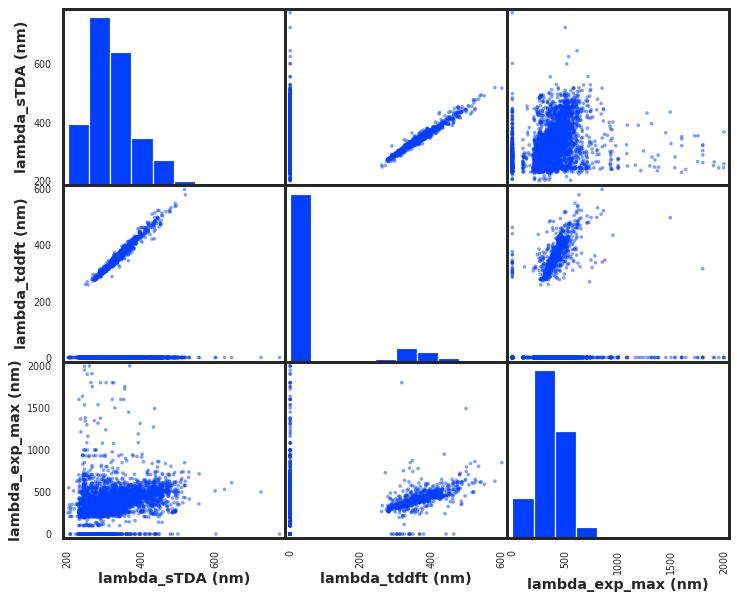

In [33]:
df2 = df[['lambda_sTDA (nm)', 'lambda_tddft (nm)', 'lambda_exp_max (nm)']]
pd.plotting.scatter_matrix(df2)


* Find the relations using `scatter_matrix`  among the  absortion with the methods `f1_sTDA`,`f1_ZINDO`, `f1_TDDFT`, `ε_Exp_max`

array([[<Axes: xlabel='f1_sTDA', ylabel='f1_sTDA'>,
        <Axes: xlabel='f1_z', ylabel='f1_sTDA'>,
        <Axes: xlabel='f1_tddft', ylabel='f1_sTDA'>],
       [<Axes: xlabel='f1_sTDA', ylabel='f1_z'>,
        <Axes: xlabel='f1_z', ylabel='f1_z'>,
        <Axes: xlabel='f1_tddft', ylabel='f1_z'>],
       [<Axes: xlabel='f1_sTDA', ylabel='f1_tddft'>,
        <Axes: xlabel='f1_z', ylabel='f1_tddft'>,
        <Axes: xlabel='f1_tddft', ylabel='f1_tddft'>]], dtype=object)

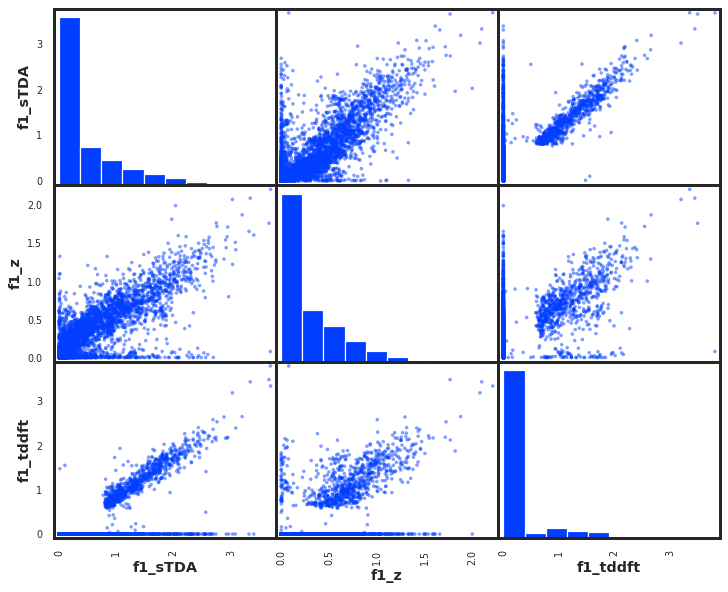

In [37]:
df3 = df[['f1_sTDA','f1_z', 'f1_tddft']]
pd.plotting.scatter_matrix(df3)


* Do a bar plot to visualize the distrution of number of ring (`NumAromaticRings`) using sns.barplot, use `df['NumAromaticRings'].value_counts()`

<Axes: >

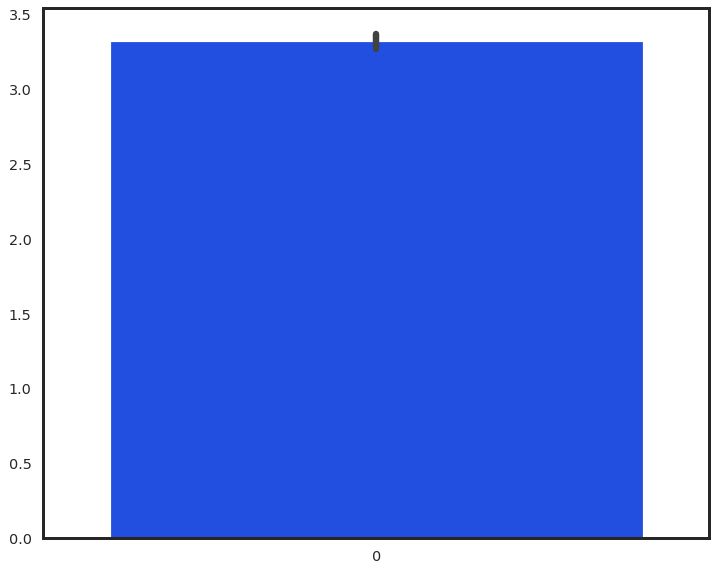

In [39]:
sns.barplot(df['NumAromaticRings'].tolist())


* Do a bar plot to visualize the distrution of number of ring (`NumAromaticHeterocycles`) using sns.barplot function


* Compare the absorption of `f1_sTDA`  and `NumAromaticRings`

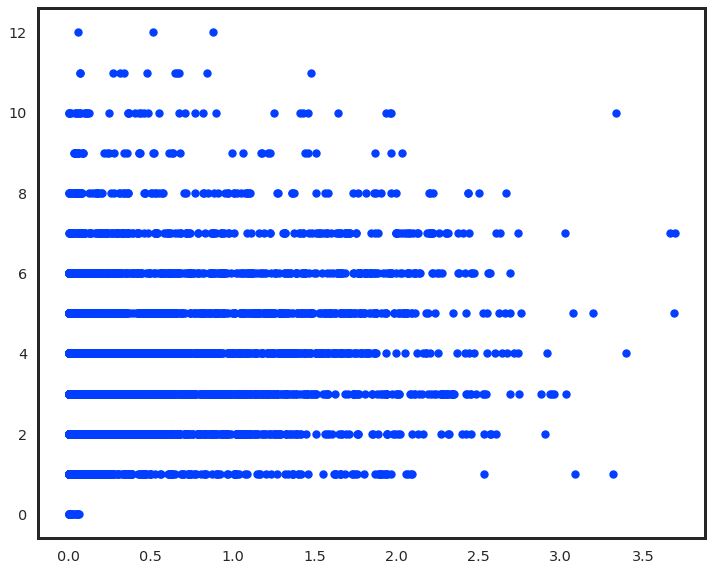

In [42]:
plt.scatter(df['f1_sTDA'].tolist(), df['NumAromaticRings'].tolist())


* Do a scatter plot that compares 'gapdft' with `lambda_tddft (nm)` and color the points with `NumAromaticRings`

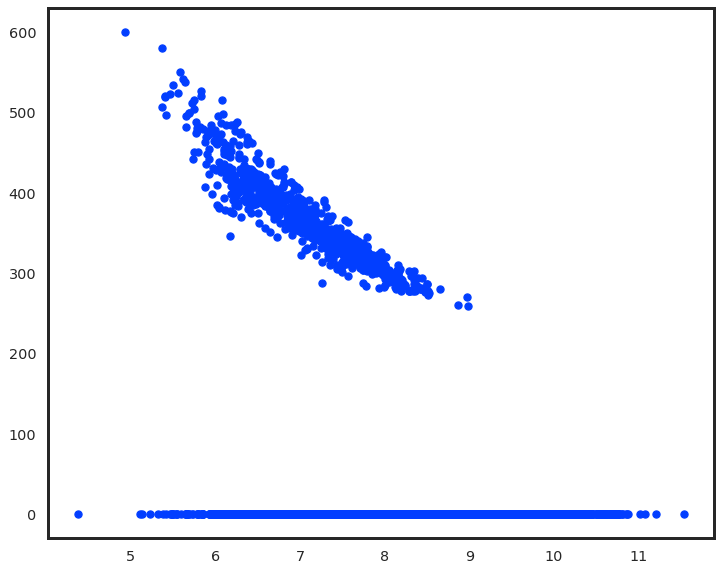

In [43]:
plt.scatter(df['gap_dft'].tolist(), df['lambda_tddft (nm)'].tolist())


* Find the systems with more than 10 aromatic rings. Do they have anything in common? Do they absorb more light or have a darker color?

/tmp/ipykernel_1728363/3200731143.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfrings['lambda_exp_max (nm)'].tolist())


<Axes: ylabel='Density'>

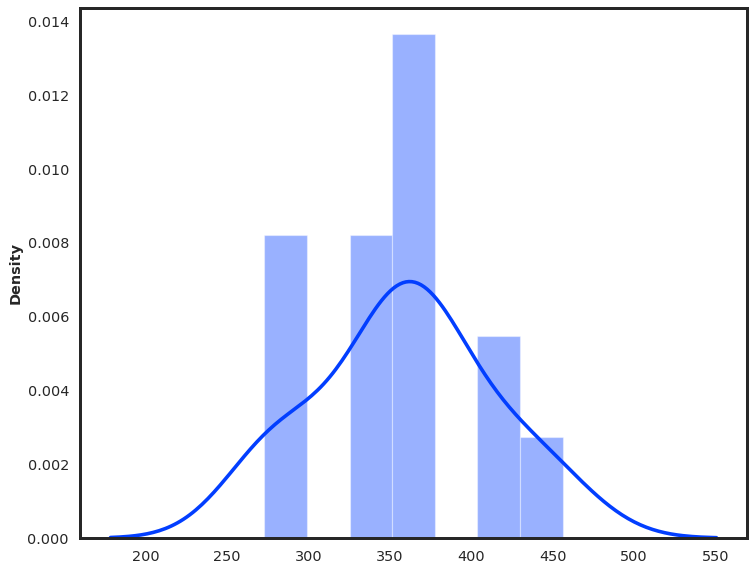

In [46]:
dfrings = df[df['NumAromaticRings'] > 10]
sns.distplot(dfrings['lambda_exp_max (nm)'].tolist())


* Find those systems with more than 10 aromatic rings and have values different to zero in `lambda_z (nm)` and `lambda_exp_min (nm)`, do those values correlate?